# Flights Data Exploration
### by Sherif Essam

## Preliminary Wrangling

> The dataset used contains the flights made on different airports during August 2020.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("airline_delay_causes.CSV")
print(df.shape)
df.head()

(1468, 22)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2020,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,5.0,0.97,0.55,...,0.00,1.0,0.0,267.0,140.0,30.0,97.0,0.0,0.0,NaN
1,2020,8,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",14.0,1.0,0.00,0.00,...,1.00,0.0,0.0,103.0,0.0,0.0,0.0,0.0,103.0,NaN
2,2020,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,9.0,6.81,0.63,...,0.88,3.0,0.0,1435.0,1290.0,41.0,53.0,0.0,51.0,NaN
3,2020,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",129.0,4.0,2.00,0.95,...,0.00,2.0,0.0,149.0,67.0,62.0,20.0,0.0,0.0,NaN
4,2020,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",93.0,4.0,2.00,0.00,...,1.00,1.0,0.0,98.0,42.0,0.0,20.0,0.0,36.0,NaN


In [3]:
print(df.dtypes)
print(df.info())

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 22 columns):
year                   1468 non-null int64
 month                 1468 non-null int64
carrier                1468 non-null object
carrier_name           1468 non-null object
airport                

In [4]:
# Adjust the column names by removing the spaces
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed:21'],
      dtype='object')

In [5]:
delay = ['arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
df[delay].head()

,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,267.0,140.0,30.0,97.0,0.0,0.0
1,103.0,0.0,0.0,0.0,0.0,103.0
2,1435.0,1290.0,41.0,53.0,0.0,51.0
3,149.0,67.0,62.0,20.0,0.0,0.0
4,98.0,42.0,0.0,20.0,0.0,36.0


By looking at all delay columns we can see that arr_delay represent all the delay (in minutes) that was caused by the five reasons (carrier-weaher-NAS-security-late aircraft).

## Data cleaning :

Before exploring the dataset, let's do some modifications first to make our data clean and ready for our investigations.  

It seems that most of the features contain one missing value. So, lets see if this one value is the same row for most of these feature so that we can remove this row.

In [6]:
# The row that contains a lot of missing values : 
df[df['arr_flights'].isnull()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed:21
56,2020,8,9E,Endeavor Air Inc.,MCI,"Kansas City, MO: Kansas City International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# removing that row using its index
df.drop(56 , axis=0 , inplace=True)
print(df.shape)
df.info()

(1467, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1467
Data columns (total 22 columns):
year                   1467 non-null int64
month                  1467 non-null int64
carrier                1467 non-null object
carrier_name           1467 non-null object
airport                1467 non-null object
airport_name           1467 non-null object
arr_flights            1467 non-null float64
arr_del15              1466 non-null float64
carrier_ct             1467 non-null float64
weather_ct             1467 non-null float64
nas_ct                 1467 non-null float64
security_ct            1467 non-null float64
late_aircraft_ct       1467 non-null float64
arr_cancelled          1467 non-null float64
arr_diverted           1467 non-null float64
arr_delay              1467 non-null float64
carrier_delay          1467 non-null float64
weather_delay          1467 non-null float64
nas_delay              1467 non-null float64
security_delay         1467 non-nul

Now, our data contains only one missing value in arr_del15 column. Let's replace it with the average arr_delay value. 

In [8]:
df['arr_del15'].fillna(df['arr_del15'].mean() , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1467
Data columns (total 22 columns):
year                   1467 non-null int64
month                  1467 non-null int64
carrier                1467 non-null object
carrier_name           1467 non-null object
airport                1467 non-null object
airport_name           1467 non-null object
arr_flights            1467 non-null float64
arr_del15              1467 non-null float64
carrier_ct             1467 non-null float64
weather_ct             1467 non-null float64
nas_ct                 1467 non-null float64
security_ct            1467 non-null float64
late_aircraft_ct       1467 non-null float64
arr_cancelled          1467 non-null float64
arr_diverted           1467 non-null float64
arr_delay              1467 non-null float64
carrier_delay          1467 non-null float64
weather_delay          1467 non-null float64
nas_delay              1467 non-null float64
security_delay         1467 non-null float64
l

In [9]:
df.drop('Unnamed:21' , axis=1 , inplace=True)
df.shape

(1467, 21)

## Data Exploration :

In [10]:
df['carrier_name'].value_counts()

SkyWest Airlines Inc.      213
Envoy Air                  129
Allegiant Air              122
Delta Air Lines Inc.       110
American Airlines Inc.      95
Frontier Airlines Inc.      91
Endeavor Air Inc.           91
Southwest Airlines Co.      89
Mesa Airlines Inc.          85
PSA Airlines Inc.           83
United Air Lines Inc.       78
Republic Airline            67
Alaska Airlines Inc.        63
JetBlue Airways             52
Spirit Air Lines            48
ExpressJet Airlines LLC     40
Hawaiian Airlines Inc.      11
Name: carrier_name, dtype: int64

In [11]:
np.count_nonzero(df['airport'].unique())

355

In [12]:
np.count_nonzero(df['carrier'].unique())

17

### What is the structure of your dataset?

> Each row of the dataset contains the number of flights made in August 2020 by specific airport and carrier and all different reasons of delay for these flights.

> Our dataset contains the number of cancelled flights and 6 different delay reasons for each one of 17 different carriers and 355 airports.

### What is/are the main feature(s) of interest in your dataset?

> The number of cancelled flights (arr_cancelled) is a very important variable in our data.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The 6 delay reasons may explain the number of cancelled flights.

## Univariate Exploration

#### Cancelled flights distribution

Let's look at the distribution of arr_cancelled (number of cancelled flights) :

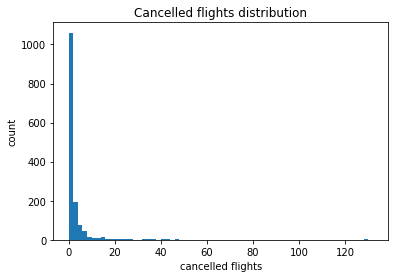

In [13]:
bins = np.arange(0 , df['arr_cancelled'].max()+2 , 2)
plt.hist(data=df , x='arr_cancelled' , bins=bins);
plt.xlabel('cancelled flights');
plt.ylabel('count')
plt.title('Cancelled flights distribution');

We can see that the number of cancelled flights is mostly less than 40, with a very few cases when it was greater that 120 which we can consider as outliers. So, Let's remove these outliers rows and then try log scale that should be useful with the very long tail above.

In [14]:
# Obtaining outliers rows 
arr_cancelled_outliers = df[df['arr_cancelled'] >= 120]
arr_cancelled_outliers

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1304,2020,8,WN,Southwest Airlines Co.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",4986.0,270.0,77.45,27.15,...,0.0,67.15,131.0,14.0,11031.0,3177.0,1300.0,3620.0,0.0,2934.0
1323,2020,8,WN,Southwest Airlines Co.,HOU,"Houston, TX: William P Hobby",3557.0,129.0,42.20,16.15,...,0.0,50.72,128.0,4.0,5652.0,1636.0,1323.0,672.0,0.0,2021.0
1416,2020,8,YV,Mesa Airlines Inc.,IAH,"Houston, TX: George Bush Intercontinental/Houston",1985.0,120.0,33.00,14.08,...,0.0,2.56,129.0,2.0,7598.0,4090.0,522.0,2637.0,0.0,349.0


In [15]:
# Removing outliers for cancelled flight variable
df = pd.concat([df , arr_cancelled_outliers]).drop_duplicates(keep=False)
df.shape

(1464, 21)

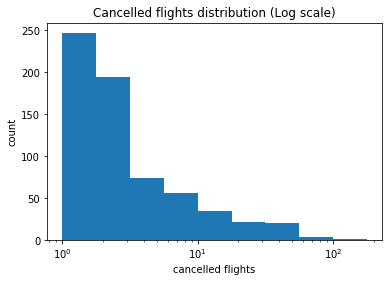

In [16]:
bins = 10 ** np.arange(0 , np.log10(df['arr_cancelled'].max())+ 0.25 , 0.25)
plt.hist(data=df , x='arr_cancelled' , bins=bins);
plt.xscale('log');
plt.xlabel('cancelled flights');
plt.ylabel('count')
plt.title('Cancelled flights distribution (Log scale)');

It seems that log scale is much more useful and we can see that number of cancelled flights is less than 10 flights in most cases with less than 200 at its maximum.

#### Flights delay distribution

Let's look at the distribution of the total flights delay (in minutes) :

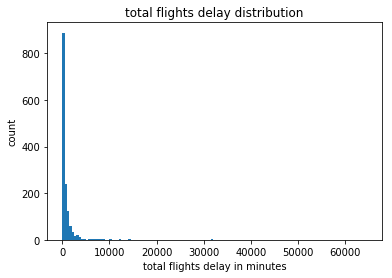

In [17]:
bins = np.arange(0 , df['arr_delay'].max()+500 , 500)
plt.hist(data=df , x='arr_delay' , bins=bins);
plt.xlabel('total flights delay in minutes');
plt.ylabel('count')
plt.title('total flights delay distribution');

After removing outliers here, also log scale would be useful because of the long tail :

In [18]:
# Obtaining outliers rows 
arr_delay_outliers = df[df['arr_delay'] >= 6000]
arr_delay_outliers

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
5,2020,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4205.0,379.0,116.98,34.10,...,1.00,120.38,35.0,17.0,31710.0,14480.0,2677.0,5205.0,34.0,9314.0
32,2020,8,9E,Endeavor Air Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",2481.0,139.0,47.53,9.15,...,0.34,53.57,19.0,0.0,12287.0,6661.0,401.0,847.0,14.0,4364.0
64,2020,8,9E,Endeavor Air Inc.,MSP,"Minneapolis, MN: Minneapolis-St Paul Internati...",1879.0,106.0,47.34,4.80,...,0.00,24.58,21.0,0.0,8532.0,5477.0,533.0,1002.0,0.0,1520.0
108,2020,8,AA,American Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",5802.0,512.0,156.19,32.39,...,5.94,82.46,14.0,10.0,30159.0,11704.0,2948.0,8547.0,267.0,6693.0
115,2020,8,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",9869.0,1028.0,282.34,65.30,...,9.60,200.03,56.0,62.0,63472.0,23936.0,7626.0,14632.0,324.0,16954.0
143,2020,8,AA,American Airlines Inc.,MIA,"Miami, FL: Miami International",2220.0,147.0,69.17,9.55,...,4.13,16.60,6.0,6.0,7509.0,4019.0,611.0,1413.0,107.0,1359.0
153,2020,8,AA,American Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",2837.0,173.0,66.22,23.46,...,2.18,21.39,7.0,2.0,14210.0,6565.0,1826.0,4017.0,90.0,1712.0
157,2020,8,AA,American Airlines Inc.,PHL,"Philadelphia, PA: Philadelphia International",2589.0,207.0,70.62,28.68,...,1.08,44.61,13.0,15.0,15828.0,6116.0,1851.0,2589.0,52.0,5220.0
158,2020,8,AA,American Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",2485.0,210.0,78.65,13.96,...,3.88,27.00,2.0,8.0,10083.0,4321.0,757.0,2503.0,150.0,2352.0
191,2020,8,AS,Alaska Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",1009.0,201.0,36.33,2.60,...,14.74,28.68,11.0,1.0,7501.0,1944.0,220.0,3413.0,469.0,1455.0


In [19]:
# Removing outliers for cancelled flight variable
df = pd.concat([df , arr_delay_outliers]).drop_duplicates(keep=False)
df.shape

(1410, 21)

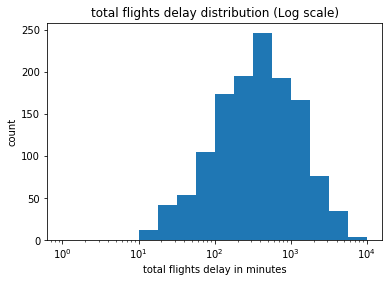

In [20]:
log_binsize = 0.25
bins = 10 ** np.arange(0 , np.log10(df['arr_delay'].max())+log_binsize , log_binsize)
plt.hist(data=df , x='arr_delay' , bins=bins);
plt.xscale('log')
plt.xlabel('total flights delay in minutes');
plt.ylabel('count')
plt.title('total flights delay distribution (Log scale)');

From the graph we can figure out that most of the flights occured with between 100 and 1000 minutes as a total delay.

#### Carriers distribution 

How many carriers are there in our data? Is their distibution balanced?

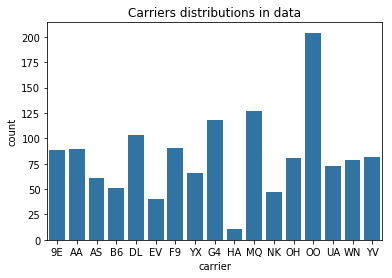

In [21]:
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='carrier' , color = base_color);
plt.title('Carriers distributions in data');

Carriers distribution is not balanced as shown above, there are some carriers that appear in our data more than others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Cancelled flight variable and total flight delay both follow log-normal distribution that were better to transform to log scale to clearly see the range that most of the points fall in.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> by looking at the first graph for both flight cancelled and delay variables, I could decide the threshold for the outliers in both variables and removed their rows from the data (about 57 rows total).

## Bivariate Exploration

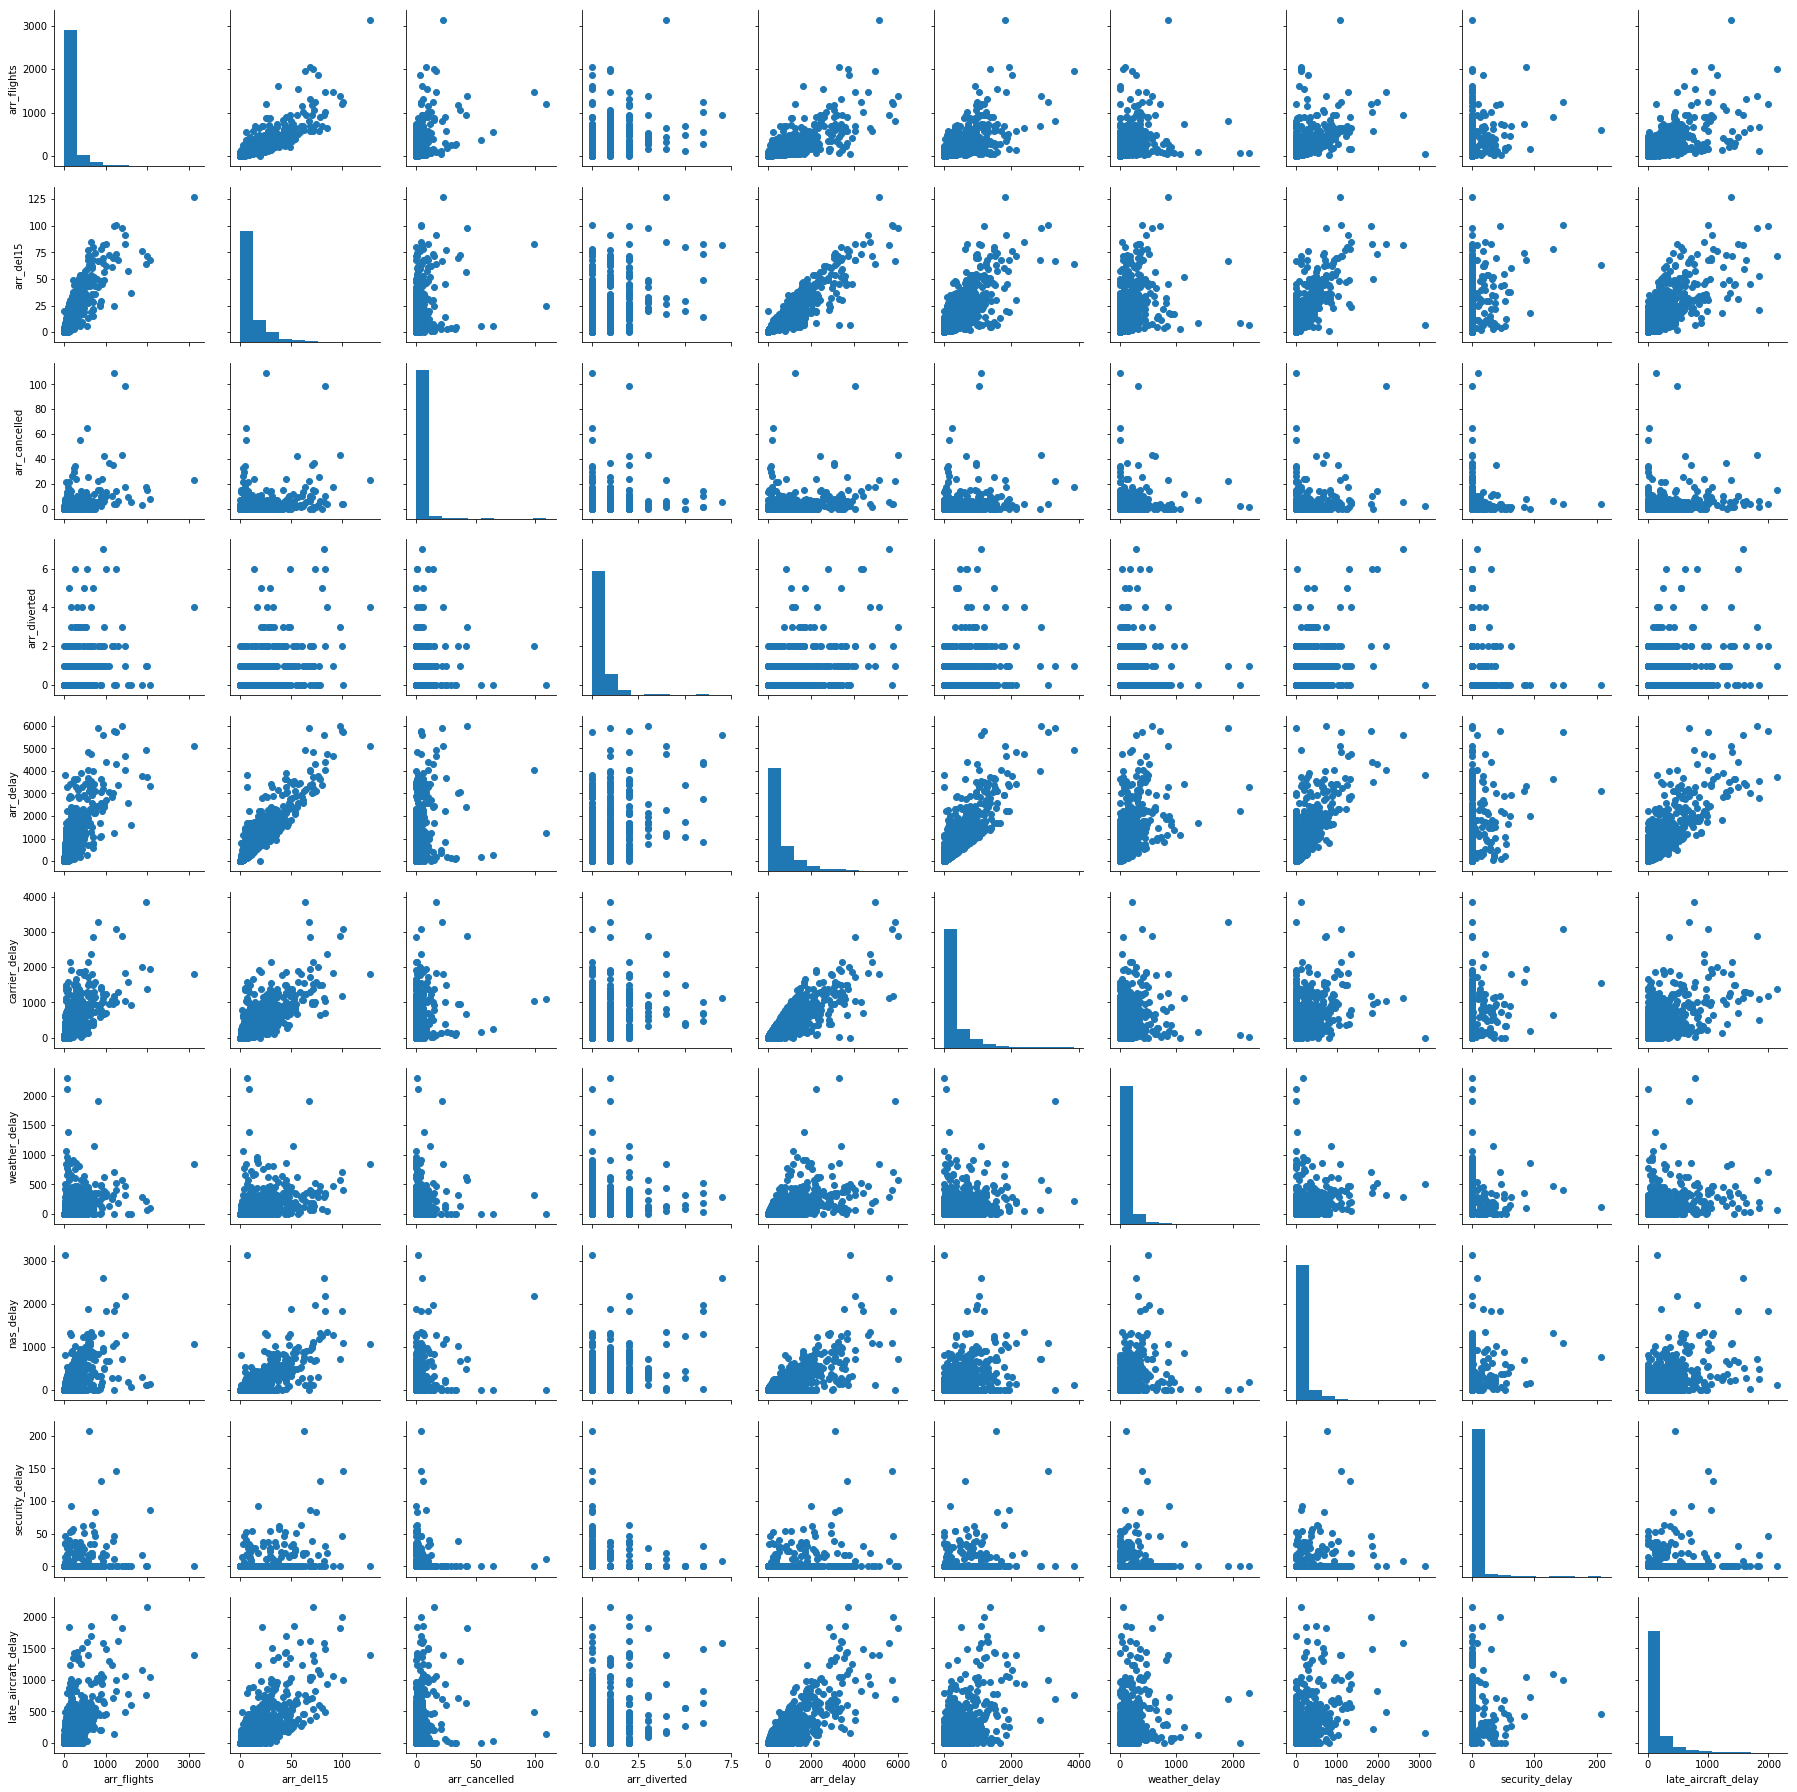

In [22]:
variables = ['arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted','arr_delay',
             'carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
variables2=['weather_ct','weather_delay']
variables3 = ['arr_flights','arr_del15','arr_cancelled','arr_diverted','arr_delay',
             'carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
g = sb.PairGrid(df , vars=variables3)
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

Now, let's focus on two graphs of the first row above that show high proportional. First row consists of graphs with total number of flights on X-axis with many other variables on Y-axis, but the two variables with high proportional with number of flights are arr_delay15 (number of flights with delay more than 15 minuter) and arr_delay (total delay in minutes).

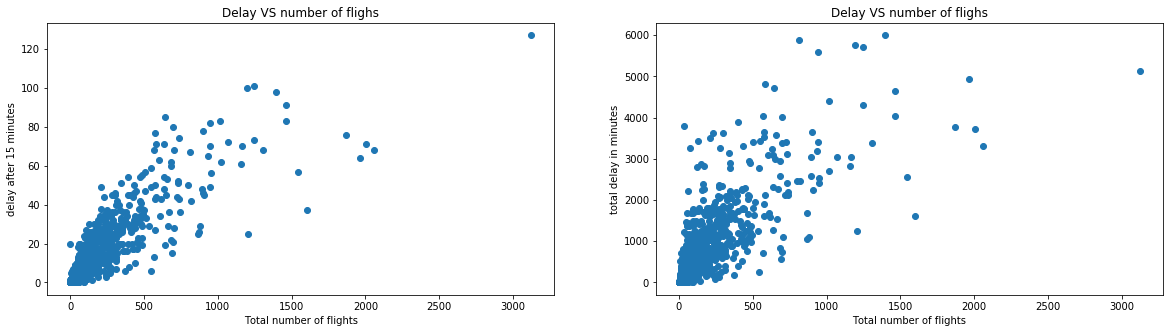

In [23]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
plt.scatter(data=df , x='arr_flights' , y='arr_del15');
plt.xlabel('Total number of flights');
plt.ylabel('delay after 15 minutes')
plt.title('Delay VS number of flighs');

plt.subplot(1, 2, 2)
plt.scatter(data=df , x='arr_flights' , y='arr_delay');
plt.xlabel('Total number of flights');
plt.ylabel('total delay in minutes')
plt.title('Delay VS number of flighs');

As shown from the graphs and also as expected, delay time is directly proportional to the total number of flights. So, when we study all delay variables we should take into consideration the number of flights.

#### Flights delay reasons :

We knew from the beginning that the total delay is the sum of 5 reasons of delays. Now, lets draw total delay with all these reasons to know which one affects the total delay the most.

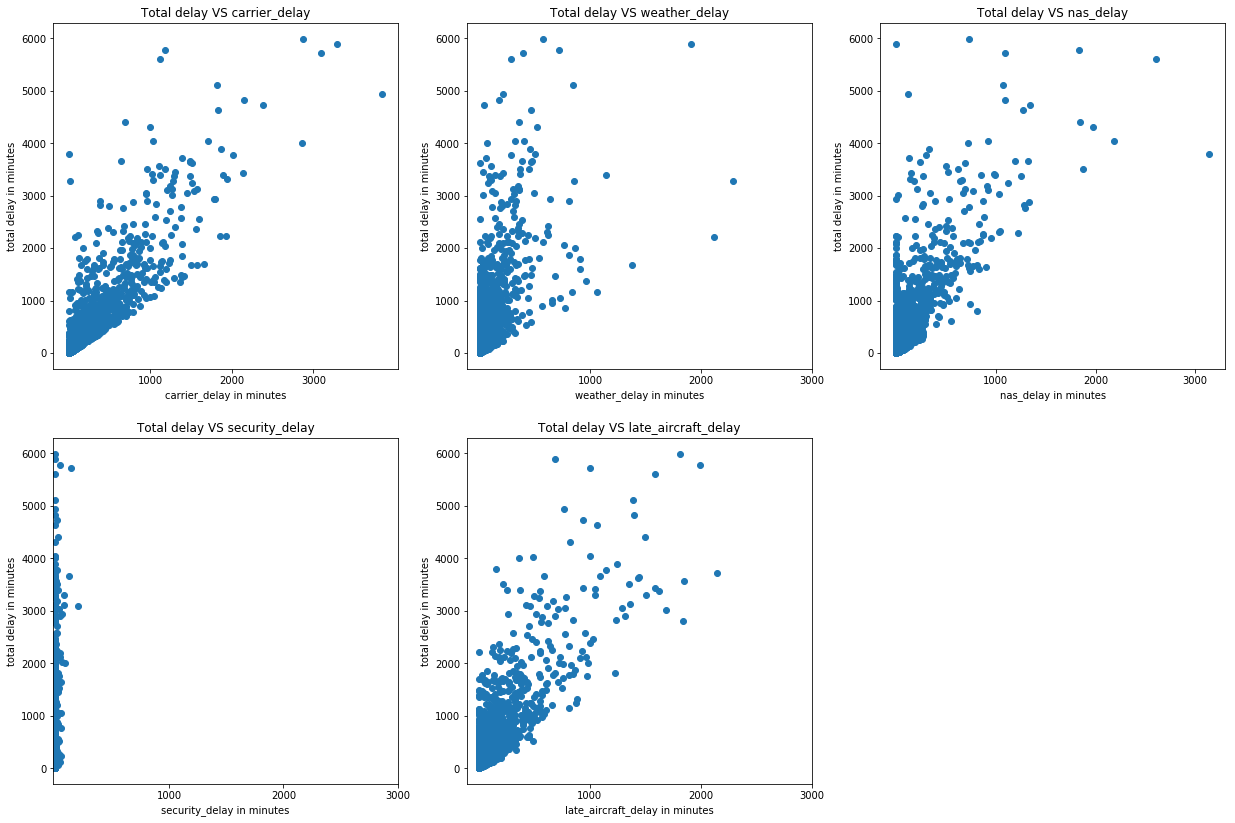

In [24]:
plt.figure(figsize = [21, 14]) 

plt.subplot(2, 3, 1) 
plt.scatter(data=df , x='carrier_delay' , y='arr_delay');
plt.xticks(np.arange(1000,4000,1000));
plt.xlabel('carrier_delay in minutes');
plt.ylabel('total delay in minutes')
plt.title('Total delay VS carrier_delay');

plt.subplot(2, 3, 2)
plt.scatter(data=df , x='weather_delay' , y='arr_delay');
plt.xticks(np.arange(1000,4000,1000));
plt.xlabel('weather_delay in minutes');
plt.ylabel('total delay in minutes')
plt.title('Total delay VS weather_delay');

plt.subplot(2, 3, 3)
plt.scatter(data=df , x='nas_delay' , y='arr_delay');
plt.xticks(np.arange(1000,4000,1000));
plt.xlabel('nas_delay in minutes');
plt.ylabel('total delay in minutes')
plt.title('Total delay VS nas_delay');

plt.subplot(2, 3, 4)
plt.scatter(data=df , x='security_delay' , y='arr_delay');
plt.xticks(np.arange(1000,4000,1000));
plt.xlabel('security_delay in minutes');
plt.ylabel('total delay in minutes')
plt.title('Total delay VS security_delay');

plt.subplot(2, 3, 5)
plt.scatter(data=df , x='late_aircraft_delay' , y='arr_delay');
plt.xticks(np.arange(1000,4000,1000));
plt.xlabel('late_aircraft_delay in minutes');
plt.ylabel('total delay in minutes')
plt.title('Total delay VS late_aircraft_delay');

We can see that security delay is very low and almost not effective to the total delay. The remaining four reasons are effective and their distibutions are close to each other with slight increase in carrier delay.

#### Carriers, their delay and cancelled flights

Let's study the distribution of carriers, the delay of each one and how they affect the number of cancelled flights to know if there is a problem in some specific carriers.

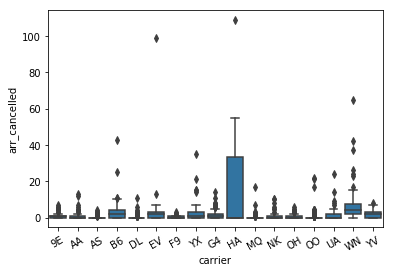

In [25]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df , x='carrier' , y='arr_cancelled' , color = base_color);
plt.xticks(rotation=30);

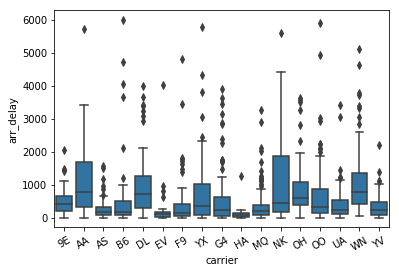

In [26]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df , x='carrier' , y='arr_delay' , color = base_color);
plt.xticks(rotation=30);

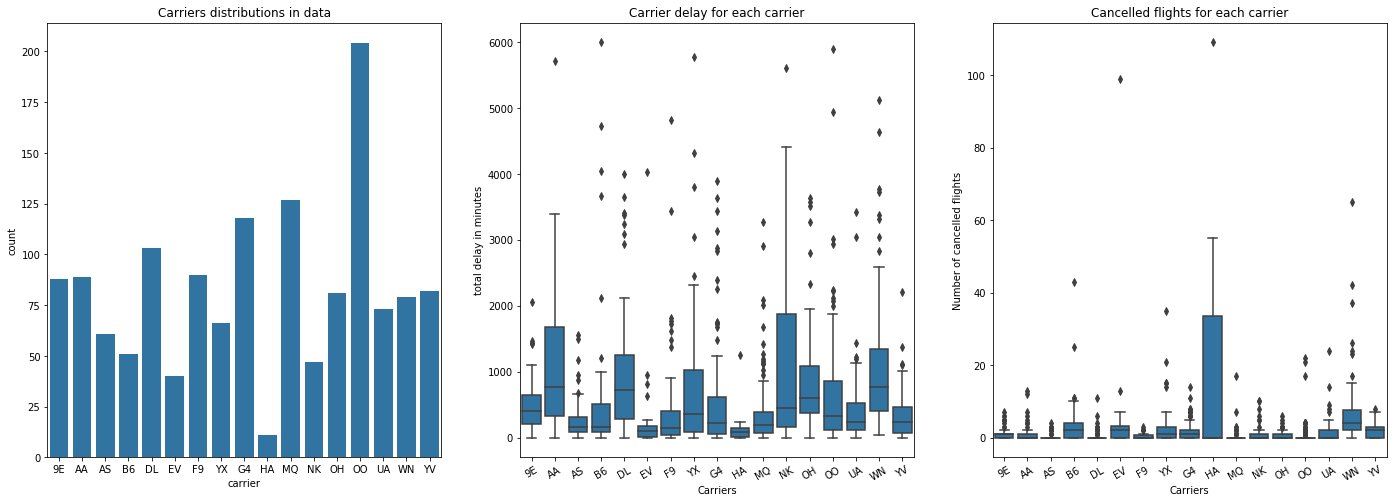

In [27]:
plt.figure(figsize = [24, 8]) 

plt.subplot(1, 3, 1) 
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='carrier' , color = base_color);
plt.title('Carriers distributions in data');

plt.subplot(1, 3, 2) 
base_color = sb.color_palette()[0]
sb.boxplot(data=df , x='carrier' , y='arr_delay' , color = base_color);
plt.xticks(rotation=30);
plt.xlabel('Carriers');
plt.ylabel('total delay in minutes')
plt.title('Carrier delay for each carrier');

plt.subplot(1, 3, 3)
base_color = sb.color_palette()[0]
sb.boxplot(data=df , x='carrier' , y='arr_cancelled' , color = base_color);
plt.xticks(rotation=30);
plt.xlabel('Carriers');
plt.ylabel('Number of cancelled flights')
plt.title('Cancelled flights for each carrier');

One of the things we can notice that the most number of cancelled flights lie with HA carrier although  HA is the least one existed in our data with very low carrier delay. So, it is clear that the carrier delay is not the reason behind cancelling the flights.
Another case that ensures our conclusion is OO carrier that existed the most in our data with slight large median and maximum carrier delay but a very low cancelled flights.

#### Delay variables vs ct variables

Let's take a look at the relationship between carrier delay with carrier_ct, also nas_delay with nas_ct :

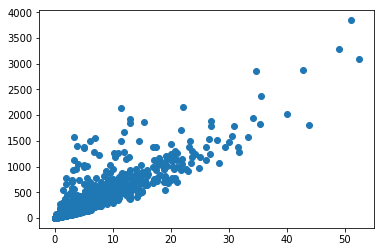

In [32]:
plt.scatter(data=df , x='carrier_ct' , y='carrier_delay');

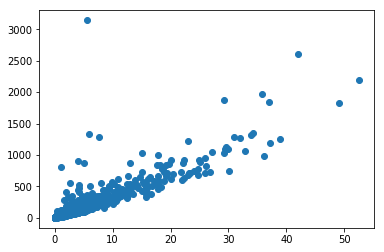

In [34]:
plt.scatter(data=df , x='nas_ct' , y='nas_delay');

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1467
Data columns (total 21 columns):
year                   1410 non-null int64
month                  1410 non-null int64
carrier                1410 non-null object
carrier_name           1410 non-null object
airport                1410 non-null object
airport_name           1410 non-null object
arr_flights            1410 non-null float64
arr_del15              1410 non-null float64
carrier_ct             1410 non-null float64
weather_ct             1410 non-null float64
nas_ct                 1410 non-null float64
security_ct            1410 non-null float64
late_aircraft_ct       1410 non-null float64
arr_cancelled          1410 non-null float64
arr_diverted           1410 non-null float64
arr_delay              1410 non-null float64
carrier_delay          1410 non-null float64
weather_delay          1410 non-null float64
nas_delay              1410 non-null float64
security_delay         1410 non-null float64
l

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most reason that affect total flight delay is carrier delay. However, cancelled flights in each carrier does not depend on the delay caused by the carrier.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> all delay variables are directly proportional to their ct variables.

## Multivariate Exploration

Multivariate plot between carrier_ct, carrier delay and cancelled flights might ensures the insight we gained before :

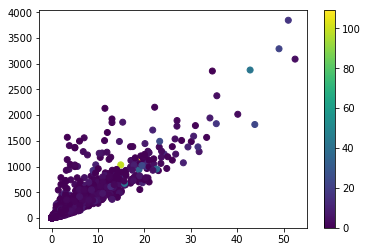

In [38]:
plt.scatter(data = df, x = 'carrier_ct', y = 'carrier_delay', c = 'arr_cancelled');

plt.colorbar()

The plot above ensures our earlier conclusions that carrier delay is directly proportional to carrier_ct but cancelled flight in each carrier does not depend on the two variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We looked before at the relationship between carrier delay and carrier_ct and also carrier delay with cancelled flights in separete, but including them in one plot made the relationship between the three variables more clear. This also true for other cariables not only for carriers.

### Were there any interesting or surprising interactions between features?

> The multivariate exploration ensures our earlier conclusions without any surprises.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!